# First pass analysis of line/loop data


## Plots to make

<ul>
    <li> Basic multinomial regression choice model </li>
    <li> Polar plot of where they go on the graph </li>
    <li> histogram of lengths before turnaround </li>
    <li> frequency of transitions </li>
    <li> Number of teleports to each reward location </li>
</ul>

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn
import scipy.stats as stt
seaborn.set(font_scale=2,style='ticks')
import os
import re
import sys
import itertools
import networkx as nx
sys.path.append("/Users/Yves/Documents/Code/structural_knowledge/packages/")

In [2]:
import mouse_poker as mpk
import mouse_poker.optimize_task.layout as lyt

# Defined functions 

In [3]:
poke_pos = [  [149,0],
         [68,19],[231,19],
       [0,62],[149,62],[298,62],
         [68,105],[231,105],
              [149,124]]

# Actual code to run stuff 

In [7]:
ROOT = "/Users/Yves/Desktop/mouse_behavior/line_loop_batch_1/"
bb  = mpk.load.create_base_df(ROOT)

In [8]:
bb = mpk.load.load_df()
good_df = bb.loc[bb['valid']]
date = '2020/02/10'
day_df = good_df.loc[good_df['date']==date]

/Users/Yves/anaconda3/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [9]:
60*10

600

In [10]:
event_times[-1]/60.

NameError: name 'event_times' is not defined

In [ ]:
state_dict0 = eval(re.findall('({.*)\n',''.join(lines))[0])
event_dict = eval(re.findall('({.*)\n',''.join(lines))[1])


In [76]:
out = mpk.load.get_metadata(lines)
experiment_name, task_name, subject_id, task_nr, graph,lineloop,date,test,summary_dict = out
date = (np.datetime64(date.replace(' ','T').replace('/','-'))).astype('object')

if (len(lines)>200 and test==False):
    valid = True
else:
    valid = False

if ((str(date.date())=='2020-02-11') and (date.time()<datetime.time(14,0,0))):
    valid = False


In [15]:
ll = []
pred_acc = []
all_bias = []
for ix in range(len(day_df)):
    sys.stdout.write('\r{}'.format(ix))
    sys.stdout.flush()
    filepath = day_df['filepath'].values[ix]
    f = open(filepath,'r')
    lines = f.readlines()
    out = mpk.load.get_metadata(lines)
    alt_ptsm,alt_struct, ptsm, struct = get_other_graph(filepath,day_df)
    experiment_name, task_name, subject_id, task_nr, graph,lineloop,date,test,summary = out
    dat_dict,events,event_times,nRews = mpk.load.parse_data(lines,None)

    out = get_DM_y(events,event_times,dat_dict,struct,alt_struct,ptsm,alt_ptsm,bin_ms=10)
    inPokes,DM = out
    
    y = np.zeros([9,inPokes.shape[0]-1])
    for i in range(inPokes.shape[0]-1): y[inPokes[i],i] = 1
        
        
    model = mpk.analyse.multinomial_model(DM.T.astype("float32"),
                                      y.astype("float32").T,
                                      9,eta=0.025,batch_size=200,
                                      seed=9,prior_std=1)
    test_cost = model.fit(500,verbose=False)
    
    ll.append(test_cost)
    pred_acc.append(np.mean((np.argmax(model.model(model.X_test,sampling=False).logits.numpy(),axis=1)==np.array([int(np.where(i)[0]) for i in model.y_test]))))
    
    all_bias.append(model.model.bias.mean().numpy())

35

In [39]:
import datetime

In [72]:
dt = np.datetime64(date.replace(' ','T').replace('/','-')).astype('object')

In [73]:
datetime.time(14,0,0)>dt.time()

False

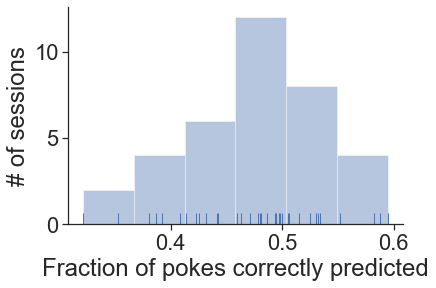

In [29]:
seaborn.distplot(pred_acc,kde=0,rug=True)
plt.ylabel('# of sessions')
plt.xlabel("Fraction of pokes correctly predicted")
seaborn.despine()

In [18]:
bias_arr = np.array(all_bias)

In [22]:
biass = np.median(bias_arr,axis=0)

In [23]:
mappable = plt.cm.ScalarMappable(cmap='Reds')
mappable.set_clim(np.min(biass),np.max(biass))

In [34]:
day_df['date'].values[0]>day_df['date'].values[0]

False

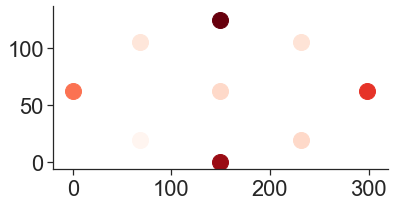

In [24]:
plt.figure(figsize=(6,3))
ijk = 0
for x,y in poke_pos:
    #print(biass[ijk])
    plt.scatter(x,y,c=np.array(mappable.to_rgba(biass[ijk])).reshape(1,-1),cmap='Reds',s=256)
    #print(ijk)
    ijk += 1
seaborn.despine()

In [48]:
y

0

In [ ]:
plt.imshow(port_dm,aspect=1000)
plt.xlim(0,5000)

In [ ]:
bb = mouse_poker.load.load_df()
good_df = bb.loc[bb['valid']]
date = '2020/02/07'
day_df = good_df.loc[good_df['date']==date]

In [ ]:
good_df = bb.loc[bb['valid']]

In [ ]:
date = '2020/02/07'
day_df = good_df.loc[good_df['date']==date]

In [ ]:
day_df

In [ ]:
ix = 18
print(day_df['filepath'].values[ix])
f = open(day_df['filepath'].values[ix],'r')
lines =f.readlines()
experiment_name, task_name, subject_id, task_nr, graph,lineloop,date,test = mouse_poker.load.get_metadata(lines)
dat_dict,events,event_times,nRews = mouse_poker.load.parse_data(lines)

y,poke_seq =mouse_poker.analyse.get_binned_pokes(events,event_times,binsize=1)
#all_edges,edge_weights, poke_count = mouse_poker.analyse.get_transition_overview(y,dat_dict,
#                                                     valid_transitions_only=False)
print(day_df.iloc[ix]['structure']=='LOOP')

In [ ]:
np.sum(dat_dict['random'])

In [ ]:
state_seq = np.array([i[0] for i in dat_dict['state']])

In [ ]:
plt.figure(figsize=(24,4))
plt.plot(state_seq,marker='.')

In [ ]:
#dat_dict['random'] = dat_dict['random'][::2]

In [ ]:
#[i[25:] for i in lines[:500] if 'POKEDPORT' in i]

In [ ]:
def get_valid_edges(dat_dict):
    edges = []
    for ctr,i in enumerate(dat_dict['port']):
        #if None not in i[1]:
        for j in i[1]:
            if j is not None and not dat_dict['random'][ctr]:
                if [i[0],j] not in edges: edges.append([i[0],j])
    return edges

In [ ]:
print(np.sum(dat_dict['random'])/nRews)

In [ ]:
teleport_to = [dat_dict['port'][i][0] for i in np.where(dat_dict['random'])[0]]
teleport_count = [teleport_to.count(i) for i in np.unique(teleport_to)]
np.cumsum(np.flipud(np.sort((teleport_count))))/np.sum(teleport_count)

In [ ]:
print(len(dat_dict['random']),len(dat_dict['port']),len(dat_dict['port']))

In [ ]:
plt.figure(figsize=(10,4))
edges = get_valid_edges(dat_dict)
plt.subplot(1,2,1)
plt.title("'Valid' transitions on graph")
G = nx.DiGraph()
G.add_edges_from(sorted(edges))
nx.draw(G,
        pos=np.array([1,-1])*poke_pos)

plt.subplot(1,2,2)
plt.title("Transition prob normed to\n out-paths from node")
edge_weights=mouse_poker.analyse.plot_transition_overview(y,dat_dict,valid_transitions_only=True)

In [ ]:
#look at rarest transitions on graph

# Batch look at what fraction go to top n teleports 

In [ ]:
batch_fracT = []
for ix in range(len(day_df)):
    #ix = 16
    #print(day_df['filepath'].values[ix])
    f = open(day_df['filepath'].values[ix],'r')
    lines =f.readlines()
    experiment_name, task_name, subject_id, task_nr, graph,lineloop,date,test = mouse_poker.load.get_metadata(lines)
    dat_dict,events,event_times,nRews = mouse_poker.load.parse_data(lines)

    y,poke_seq =mouse_poker.analyse.get_binned_pokes(events,event_times,binsize=1)
    #print(day_df.iloc[ix]['structure']=='LOOP')
    teleport_to = [dat_dict['port'][i][0] for i in np.where(dat_dict['random'])[0] if not dat_dict['random'][i-1]]
    teleport_count = [teleport_to.count(i) for i in [0,3,5,8]]
    batch_fracT.append((np.flipud(np.sort((teleport_count))))/np.sum(teleport_count))

In [ ]:
batch_fracT = np.array(batch_fracT)

In [ ]:
mu = np.array(batch_fracT).mean(axis=0)
sem = stt.sem(np.array(batch_fracT))

In [ ]:
plt.bar(range(4),mu,yerr=sem)
for kk,d_ in enumerate(batch_fracT.T):
    plt.scatter(kk*np.ones(len(d_))+np.random.normal(scale=.065,size=len(d_)),
                d_,zorder=100,color='.3',alpha=.3)
plt.ylabel("Fraction teleported to")
plt.xlabel("Sorted teleport target")
plt.ylim(0,1)
plt.xticks(range(4),range(1,5))
#plt.xticks([0,1],['Line','Loop'])
plt.tight_layout()
seaborn.despine()

In [ ]:
plt.bar(range(4),mu,yerr=sem)
for kk,d_ in enumerate(batch_fracT.T):
    plt.scatter(kk*np.ones(len(d_))+np.random.normal(scale=.065,size=len(d_)),
                d_,zorder=100,color='.3',alpha=.3)
plt.ylabel("Fraction teleported to")
plt.xlabel("Sorted teleport target")
plt.ylim(0)
plt.xticks(range(4),range(1,5))
#plt.xticks([0,1],['Line','Loop'])
plt.tight_layout()
seaborn.despine()

# Batch look at 'run' lengths 

In [ ]:
batch_seqLength = []
for ix in range(len(day_df)):
    #ix = 16
    #print(day_df['filepath'].values[ix])
    f = open(day_df['filepath'].values[ix],'r')
    lines =f.readlines()
    experiment_name, task_name, subject_id, task_nr, graph,lineloop,date,test = mouse_poker.load.get_metadata(lines)
    dat_dict,events,event_times,nRews = mouse_poker.load.parse_data(lines)
    allSeqLen = get_sequence_lengths(dat_dict)
    batch_seqLength.extend(allSeqLen)

In [ ]:
tmp = np.array([batch_seqLength.count(i) for i in range(9)])
print('Length of sequences in consective direction\n')
for i in range(1,9):
    print('length %s, count %s' %(i,tmp[i]))

In [ ]:
tmp = np.array([batch_seqLength.count(i) for i in range(9)])
print('Length of sequences in consective direction\n')
for i in range(1,9):
    print('length %s, count %s' %(i,tmp[i]))

In [ ]:
plt.plot(range(1,9),np.cumsum(tmp[1:]/np.sum(tmp[1:])),label='Sequence p')
#plt.plot(range(1,9),stt.geom(0.75).pmf(np.arange(1,9)),label='Geometric; p=0.75')

plt.xlabel("Sequence length")
plt.ylabel("Probability")
seaborn.despine()

In [ ]:
def get_sequence_lengths(dat_dict):
    """ Get length of walks in one direction on the graph
        of a particular length        
    """
    new = True
    increasing = False
    decreasing = False
    allSeqlen = []
    len_seq = 0.

    tmp = np.array([i[0] for i in dat_dict['state']])

    
    for i0,i1 in zip(tmp[:-1],tmp[1:]):

        
        #deal with teleports
        if np.abs(i0-i1)!=1:
            increasing = False
            decreasing = False
            new = True
            #allSeqlen.append(len_seq)
            len_seq = 0
        if increasing and not new:
            if i1>i0:
                #print(1,i0)
                len_seq += 1
            elif i1<i0:
                #print(2)
                allSeqlen.append(len_seq)
                len_seq = 0
                new = True

        if decreasing and not new:
            if i1>i0:
                allSeqlen.append(len_seq)
                new = True
                len_seq = 0
            elif i1<i0:
                len_seq += 1

        if new:
            if i1>i0:
                increasing = True
                decreasing = False
            elif i1<i0:
                decreasing = True
                increasing = False
            len_seq += 1
            new = False
            #print(decreasing,increasing)
    return allSeqlen


#  Batch stuff

In [ ]:
all_pairs = []
for ix in range(len(day_df)):
    f = open(day_df['filepath'].values[ix],'r')
    if day_df.iloc[ix]['structure']=='LOOP':
        lines =f.readlines()
        experiment_name, task_name, subject_id, task_nr, graph,lineloop,date,test = mouse_poker.load.get_metadata(lines)
        dat_dict,events,event_times,nRews = mouse_poker.load.parse_data(lines)

        y,poke_seq =mouse_poker.analyse.get_binned_pokes(events,event_times,binsize=1)
        all_edges,edge_weights, poke_count,edge_weights_unNorm = mouse_poker.analyse.get_transition_overview(y,dat_dict,
                                                             valid_transitions_only=True)
        
        valid_edges = get_valid_edges(dat_dict)
        
        pairs = []
        looked_at = []
        for ctr1,e in enumerate(all_edges):
            if list(e) in valid_edges:
                for ctr2,e2 in enumerate(all_edges):
                    if (set(e)==set(e2)) and (e!=e2):
                        
                        pairs.append([edge_weights[ctr1],edge_weights[ctr2]])
        all_pairs.extend(pairs)

In [ ]:
looked_at = []
all_pairs2 = []
for p in all_pairs:
    if set(p) not in looked_at:
        all_pairs2.append(p)
        looked_at.append(set(p))

In [ ]:
len(all_pairs2)

In [ ]:
len(all_pairs)

In [ ]:
#[[1,2],[1]]==[[1,2],[1]]

In [ ]:
np.corrcoef([i[0] for i in all_pairs2],[i[1] for i in all_pairs2])

In [ ]:
seaborn.jointplot([i[0] for i in all_pairs2],
                  [i[1] for i in all_pairs2],
                  kind='reg')

#plt.plot([0,1],[0,1],color='.3')

In [ ]:
stt.ttest_ind(good_df.loc[good_df['structure']=='LINE'].nRews.values,
              good_df.loc[good_df['structure']=='LOOP'].nRews.values)

In [ ]:
muLI = np.mean(good_df.loc[good_df['structure']=='LINE'].nRews.values)
muLO = np.mean(good_df.loc[good_df['structure']=='LOOP'].nRews.values)


semLI = stt.sem(good_df.loc[good_df['structure']=='LINE'].nRews.values)
semLO = stt.sem(good_df.loc[good_df['structure']=='LOOP'].nRews.values)

plt.bar([0,1],[muLI,muLO],yerr=[semLI,semLO])

plt.ylabel("Mean # of rewards \nper session")
plt.xlabel("Graph Type")
plt.xticks([0,1],['Line','Loop'])
plt.tight_layout()
seaborn.despine()

In [ ]:
def get_edges_and_layout(lines):
    """ Function that takes in file and returns edges and layout"""
    nextEdges = False
    nextLayout = False
    edge_set = None
    for l in lines:
        
        if nextLayout:
            nextLayout = False
            layout = eval(l[3:])
            break
        if nextEdges:
            edge_set = eval(l[3:])
            nextEdges = False
            nextLayout = True
        if ('LOOP' in l or 'LINE' in l):
            nextEdges = True
        if 'task_nr' in l:
            task_nr = int(re.findall('task_nr ([0-9])\n',l)[0])
    
    edges = edges = [(kk,i) for kk,e in enumerate(edge_set) for i in e]
    return edges, edge_set, layout, task_nr

In [ ]:
import imp

In [ ]:
mouse_poker = imp.reload(mouse_poker)

In [ ]:
ix = 22
f = open(day_df['filepath'].values[ix],'r')
lines =f.readlines()
experiment_name, task_name, subject_id, task_nr, graph,lineloop,date,test = mouse_poker.load.get_metadata(lines)
dat_dict,events,event_times,nRews = mouse_poker.load.parse_data(lines)

y,poke_seq =mouse_poker.analyse.get_binned_pokes(events,event_times,binsize=1)
#all_edges,edge_weights, poke_count = mouse_poker.analyse.get_transition_overview(y,dat_dict,
#                                                     valid_transitions_only=False)
print(day_df.iloc[ix]['structure']=='LOOP')

In [ ]:
len(poke_seq)

In [ ]:
len(dat_dict['random'])

In [ ]:
len(dat_dict['state'])

In [ ]:
edges = list(set(reconstruct_graph(dat_dict)))

In [ ]:
edges = list(set(reconstruct_graph(dat_dict)))
G = nx.DiGraph()
G.add_edges_from([i for i in edges if None not in i])
nx.draw(G,
        pos=np.array([1,-1])*poke_pos)

In [ ]:
edge_weights=mouse_poker.analyse.plot_transition_overview(y,dat_dict,valid_transitions_only=True)

In [ ]:
y,poke_seq =mouse_poker.analyse.get_binned_pokes(events,event_times,binsize=1)

In [ ]:
poke_seq = [np.where(y[:,i])[0][0] for i in np.where(y.sum(axis=0))[0]]

In [ ]:
poke_times = np.where(y.sum(axis=0))[0]

In [ ]:
bout_edges = np.concatenate([[0],np.where((poke_times[1:]-poke_times[:-1])>1000)[0]])

In [ ]:
bout_seqs = []
for st,nd in zip(bout_edges[:-1],bout_edges[1:]):
    if (nd-st)>1:
        bout_seqs.append(poke_seq[st:nd+1])

In [ ]:
all_edges = []
for i in range(9):
    for j in range(9):
        all_edges.append([i,j])

In [ ]:
seq_counter = [0]*len(all_edges)
for p1,p2 in zip(poke_seq[:-1],poke_seq[1:]):
    
    for kk,nP in enumerate(all_edges):
        if [p1,p2]==nP:
            seq_counter[kk] += 1

In [ ]:
seq_counter = np.array(seq_counter).reshape(9,-1)
edge_weights = (seq_counter/np.sum(seq_counter,axis=1)).flatten()

In [ ]:
G = nx.DiGraph()
for i in range(9):
    G.add_node(i,pos=(poke_pos[i][0],poke_pos[i][1]))

for e,w in zip(all_edges,edge_weights):
    G.add_edge(e[0],e[1],weight=10*w)

In [ ]:
nx.draw_networkx_nodes(G,pos=poke_pos,node_color='k')

#nodes_ = nx.get_node_attributes(G)
nx.draw_networkx_edges(G,poke_pos,
                       edge_color=edge_weights,
                       edge_vmin=0,edge_vmax=np.max(edge_weights),
                       edge_cmap=matplotlib.cm.Greys)
seaborn.despine(bottom=True,left=True)

In [ ]:
np.sum(seq_counter,axis=1)

In [ ]:
seq_counter[0]/seq_counter[0].sum()

In [ ]:
seaborn.distplot(poke_times[1:] - poke_times[:-1],bins=np.linspace(0,2000,num=50),kde=0)

In [ ]:
def get_poke_bouts(y,cutoff=1000):
    """ Get sublists of sequences of pokes if the pokes
        occurred within cutoff of other pokes
    """
    poke_seq = [np.where(y[:,i])[0][0] for i in np.where(y.sum(axis=0))[0]]
    poke_times = np.where(y.sum(axis=0))[0]
    
    bout_seqs = []
    for st,nd in zip(bout_edges[:-1],bout_edges[1:]):
        bout_seqs.append(poke_seq[st:nd])

In [ ]:
ts = mouse_poker.analyse.get_distribution_of_poke_times(events,event_times)

In [ ]:
seaborn.distplot(ts,kde=0,bins=np.linspace(0,.5,num=100))


In [ ]:
inPoke_events=  ['poke_'+str(i) for i in range(1,10)]

In [ ]:
events[1]

In [ ]:
all_poke_seq = np.array([i for i in events if i in inPoke_events])

allNextPoke = []
for inPk in inPoke_events:
    inPk_ixs = np.where(all_poke_seq==inPk)[0]
    
    tmp = []
    for ix2 in inPk_ixs:
        if ix2<(len(all_poke_seq)-1):
            tmp.append(all_poke_seq[ix2+1])
    allNextPoke.append(tmp)

In [ ]:
plt.figure(figsize=(13,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    poke_counts = [allNextPoke[i].count(ik) for ik in inPoke_events]
    plt.scatter([i[0] for i in poke_pos],[i[1] for i in poke_pos],c=poke_counts,s=700,cmap='Reds')
    plt.xlim(-50,350)
    plt.ylim(-50,150)
#seaborn.despine()

In [ ]:
poke_counts = [events.count(i) for i in inPoke_events]

In [ ]:
plt.scatter([i[0] for i in poke_pos],[i[1] for i in poke_pos],c=poke_counts,s=900,cmap='Reds')

In [ ]:
for i 

In [ ]:
2 − 2 cos(2πk/n)